In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_science_job.csv")

In [3]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [9]:
filtered_col = [col for col in df.columns if df[col].isnull().mean() < 0.05  and df[col].isnull().mean() > 0]
filtered_col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [11]:
df[filtered_col].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
3223,0.920,no_enrollment,Graduate,20.0,36.0
14726,0.910,no_enrollment,Masters,16.0,138.0
12095,0.855,no_enrollment,Graduate,8.0,101.0
12019,0.903,no_enrollment,Graduate,4.0,200.0
502,0.910,no_enrollment,Graduate,9.0,56.0


In [14]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [15]:
len(df[filtered_col].dropna())/len(df)

0.8968577095730244

In [16]:
new_df = df[filtered_col].dropna()

In [17]:
print("original df ",df.shape)
print("new df ",new_df.shape)

original df  (19158, 13)
new df  (17182, 5)


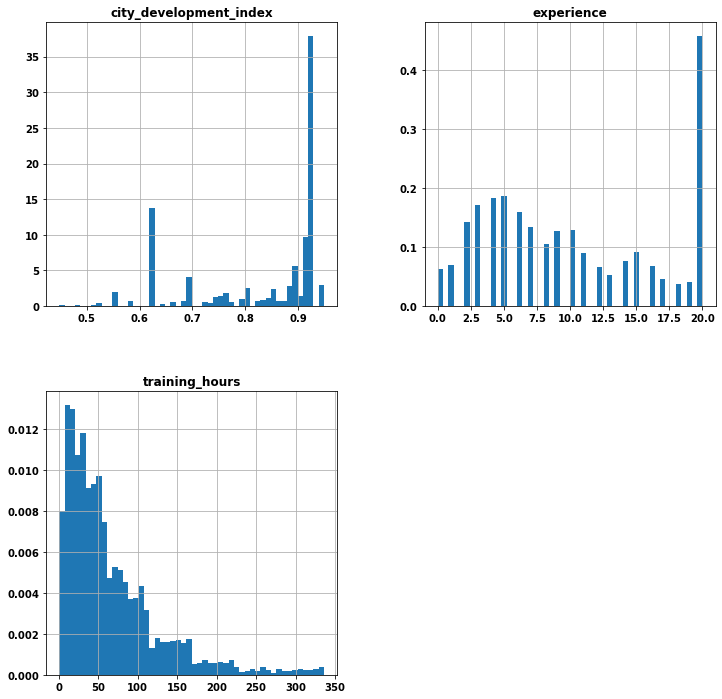

In [20]:
new_df.hist(bins=50,density=True,figsize=(12, 12))
plt.show()

<AxesSubplot:>

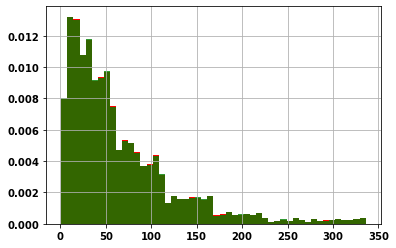

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

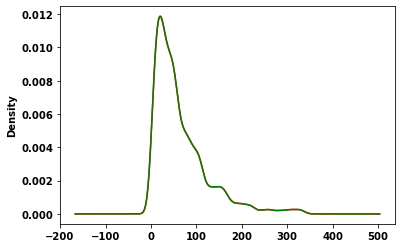

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
#before CCA (complete case analysis)
df["training_hours"].plot.density(color='Red')
# data after cca
new_df['training_hours'].plot.density(color='green')

<AxesSubplot:>

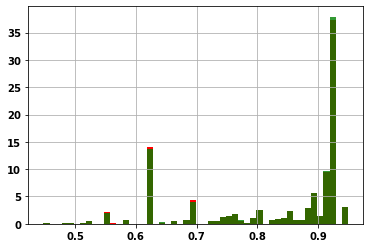

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

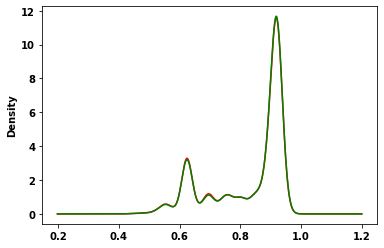

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
#before CCA (complete case analysis)
df["city_development_index"].plot.density(color='Red')
# data after cca
new_df['city_development_index'].plot.density(color='green')

<AxesSubplot:>

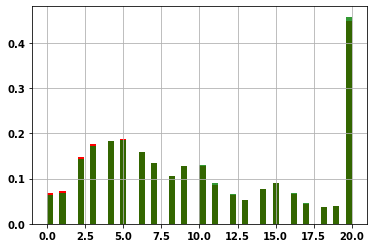

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

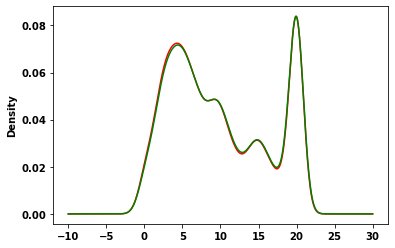

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
#before CCA (complete case analysis)
df["experience"].plot.density(color='Red')
# data after cca
new_df['experience'].plot.density(color='green')